<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/13NovPoly_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion polinomica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

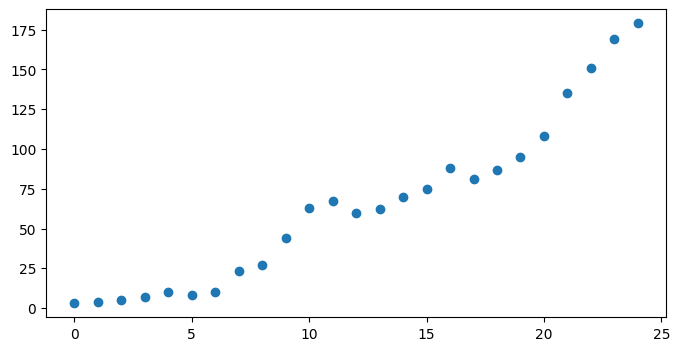

In [ ]:
y =[3,4,5,7,10,8,10,23,27,44,63,67,60,62,70,75,88,81,
    87,95,108,135,151,169,179]
x =np.arange(len(y))
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.show

In [ ]:
# Genereador de caracteristicas polinomiales
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1,1))
poly_features # regresa x, x^2

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.]])

In [ ]:
# Utilizar el modelo lineal
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,y)
y_pred = poly_reg_model.predict(poly_features)

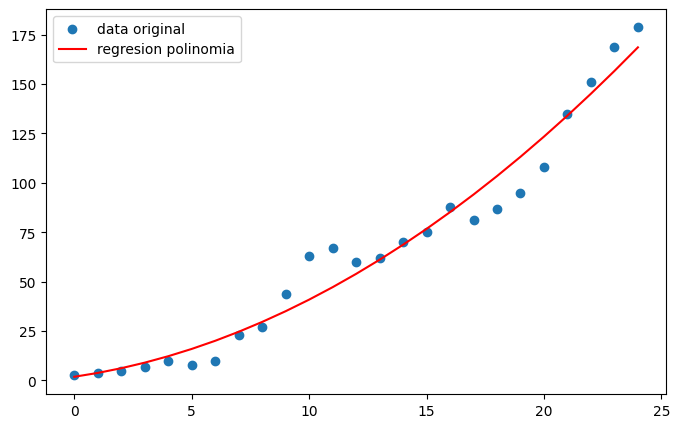

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x,y,label='data original')
plt.plot(x,y_pred,c='red',label='regresion polinomia')
plt.legend(loc='best');

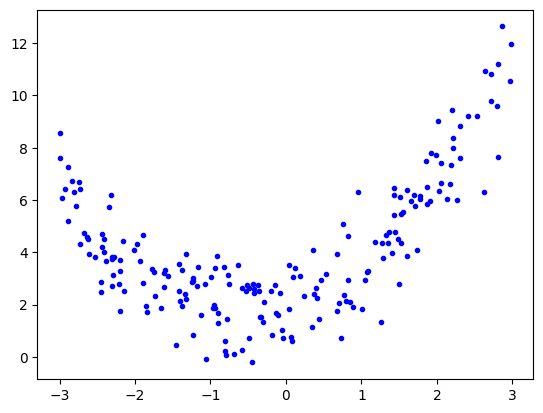

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = 6*np.random.rand(200,1) - 3
y = 0.8*x**2 + 0.9*x +2 + np.random.randn(200,1)
plt.plot(x,y,'b.');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
## probando un modelo lineal
lr =LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(f'R2: {r2_score(y_test,y_pred):.3f}')
print(f'rmse: {(mean_squared_error(y_test,y_pred)**0.5):.3f}')

R2: -0.018
rmse: 2.348


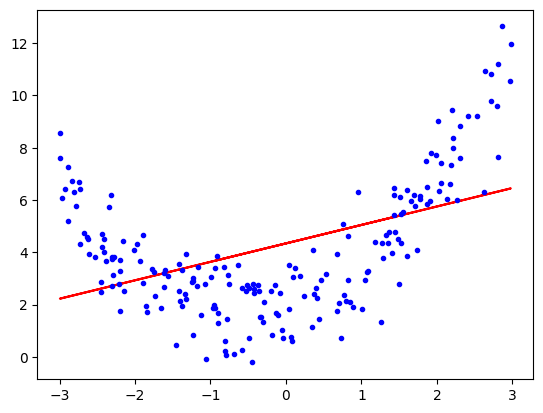

In [ ]:
plt.plot(x_train,lr.predict(x_train),c='r')
plt.plot(x,y,'b.')

In [ ]:
# Regresion polinomial
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_train)
y_pred = lr.predict(x_test_poly)
print(' R2 : ',r2_score(y_test,y_pred)) # Es optimo si es cercano a 1
print(' RSME : ',np.sqrt(mean_squared_error(y_test,y_pred))) # Es optimo si es menor a 1

 R2 :  0.7857828657665774
 RSME :  1.0767088360694193


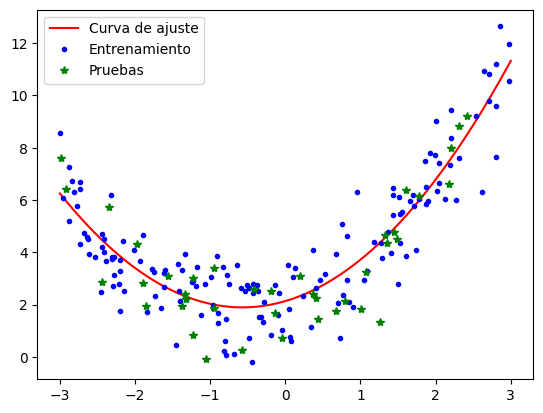

In [ ]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new_pred = lr.predict(x_new_poly)
plt.plot(x_new,y_new_pred,'r',label='Curva de ajuste')
plt.plot(x_train,y_train,'b.',label='Entrenamiento')
plt.plot(x_test,y_test,'g*',label='Pruebas')
plt.legend()
plt.show()

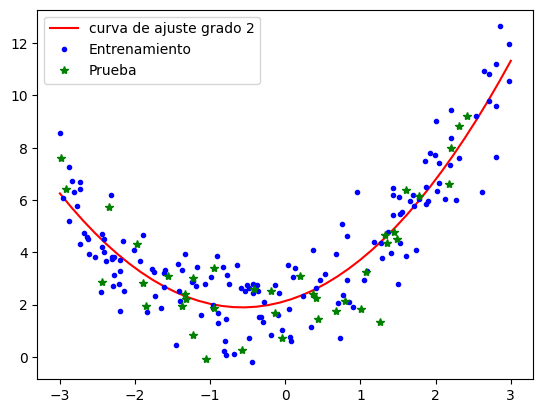

(0.7857828657665774, 1.0767088360694193)

In [ ]:
from sklearn.pipeline import make_pipeline
def poly_reg(degree,x_train,x_test,y_train,y_test,plot=False):
  test_size = y_test.shape[0]
  x_new = np.linspace(-3,3,test_size).reshape(test_size,1)
  pipe_poly = make_pipeline(
      PolynomialFeatures(degree=degree,include_bias=False),
      LinearRegression()
  )
  pipe_poly.fit(x_train,y_train)
  y_new_pred = pipe_poly.predict(x_test)
  if plot:
    plt.plot(x_new,pipe_poly.predict(x_new),label=f'curva de ajuste grado {degree}',c='red')
    plt.plot(x_train,y_train,'b.',label='Entrenamiento')
    plt.plot(x_test,y_test,'g*',label='Prueba')
    plt.legend(loc='best')
    plt.show()
  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_new_pred))
  return (r2,rmse)

poly_reg(2,x_train,x_test,y_train,y_test,plot=True)

## Ejemplo 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

In [ ]:
x1 = np.absolute(np.random.randn(100,1)*10)
x2 = np.absolute(np.random.randn(100,1)*30)
y = 2*x1**2 + 3*x1 + 2+ np.random.randn(100,1)*20

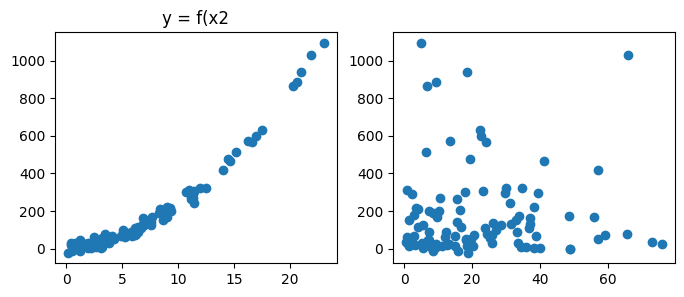

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(8,3))
axes[0].scatter(x1,y)
axes[0].set_title('y = f(x1)')
axes[1].scatter(x2,y)
axes[0].set_title('y = f(x2')
plt.show()

In [ ]:
# Crear dataframe
df = pd.DataFrame({'x1':x1.reshape(100,), 'x2':x2.reshape(100,), 'y':y.reshape(100,)}, index=range(100))
df.head()

,x1,x2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269


In [ ]:
# Características polinoimales
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X,y = df[['x1','x2']], df['y']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(100, 5)

In [ ]:
# Separar conjuntos, Aplicar modelo lineal
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()

In [ ]:
# Ajuste y Predicción
poly_reg.fit(X_train, y_train)
y_pred = poly_reg.preict(X_test)

from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
poly_reg_rmse

TypeError: ignored

In [ ]:
# Comparar con modelo lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_y_pred = lin_reg.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_pred))
lin_reg_rmse

62.302487453878506